In [170]:
import pandas as pd
import numpy as np

In [171]:
df = pd.read_csv("placement.csv")

In [172]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [174]:
df.isnull().any()

Unnamed: 0    False
cgpa          False
iq            False
placement     False
dtype: bool

In [175]:
# STEPS

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deplo the model

In [176]:
df = df.iloc[:, 1:]

In [177]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [178]:
import matplotlib.pyplot as plt

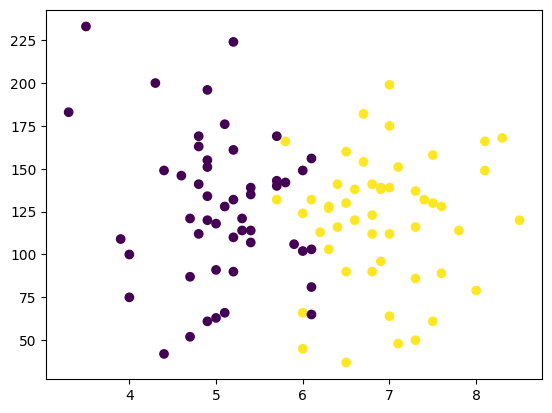

In [179]:
plt.scatter(df.cgpa, df.iq, c = df['placement'])

In [180]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [181]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [182]:
y.shape

(100,)

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# train_test_split(X, y, test_size=0.1)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [186]:
X_train

,cgpa,iq
20,6.6,120.0
77,7.3,50.0
78,6.1,81.0
43,6.8,141.0
7,5.0,63.0
...,...,...
36,5.7,140.0
8,6.1,156.0
64,7.0,64.0
21,7.1,151.0


In [187]:
y_test

76    0
55    1
11    1
22    0
83    1
3     1
70    1
56    0
34    0
96    0
Name: placement, dtype: int64

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()

In [190]:
X_train_scaled  = scaler.fit_transform(X_train) 

In [191]:
X_train_scaled 

array([[ 0.55025736, -0.10302387],
       [ 1.17040429, -1.84778292],
       [ 0.10729526, -1.07510391],
       [ 0.72744219,  0.42040385],
       [-0.86722134, -1.52375624],
       [-1.1329986 , -0.92555314],
       [-2.19610762,  2.71351575],
       [-1.04440618, -0.3024249 ],
       [-0.95581376,  0.24592794],
       [-0.77862892,  0.09637717],
       [-0.77862892, -1.44898085],
       [ 0.90462703, -0.3024249 ],
       [-0.86722134, -0.15287413],
       [-1.84173795, -0.37720029],
       [-1.39877586,  0.61980488],
       [-1.22159102,  0.5450295 ],
       [ 0.46166494,  0.89398131],
       [ 0.90462703,  1.26785825],
       [-1.04440618,  0.42040385],
       [ 0.46166494, -2.1718096 ],
       [ 1.43618154,  0.09637717],
       [ 1.87914364,  1.04353208],
       [ 0.72744219, -0.02824848],
       [ 1.34758912,  0.84413105],
       [-0.15848199,  1.04353208],
       [ 1.43618154, -0.87570288],
       [-0.60144409, -0.07809874],
       [-0.60144409, -0.25257464],
       [ 0.55025736,

In [192]:
X_test_scaled  = scaler.fit_transform(X_test) 

In [193]:
X_test_scaled

array([[-0.9904173 ,  1.01675978],
       [ 1.40309118, -0.12849162],
       [ 0.6602782 ,  0.54189944],
       [-0.9904173 ,  0.03910615],
       [ 1.15548685,  0.31843575],
       [ 1.07295208,  0.37430168],
       [ 0.16506955,  0.23463687],
       [ 0.        , -1.4972067 ],
       [-1.07295208,  1.24022346],
       [-1.40309118, -2.1396648 ]])

In [194]:
from sklearn.linear_model import LogisticRegression 

In [195]:
clf = LogisticRegression()

In [196]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [200]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [198]:
y_test

76    0
55    1
11    1
22    0
83    1
3     1
70    1
56    0
34    0
96    0
Name: placement, dtype: int64

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
accuracy_score(y_test, y_pred)

0.9

In [206]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

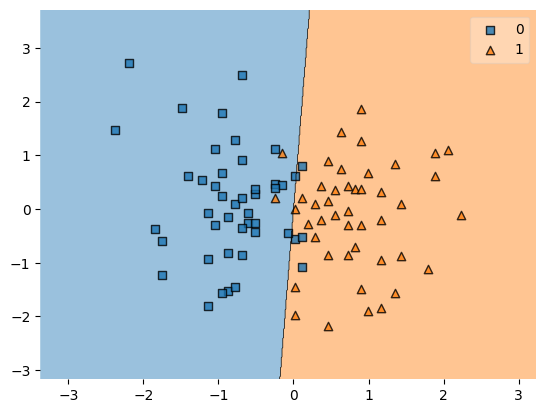

In [209]:
plot_decision_regions(X_train_scaled, y_train.values, clf=clf, legend = 1)

In [210]:
import pickle

In [211]:
pickle.dump(clf, open('model.pkl','wb'))